# Importing required libraries

In [5]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import cv2
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation,Flatten, Conv2D, MaxPooling2D

In [6]:
mnist = tf.keras.datasets.mnist

In [7]:
(x_train,y_train),(x_test,y_test) = mnist.load_data()

11490434/11490434 [==============================] - 1s 0us/step


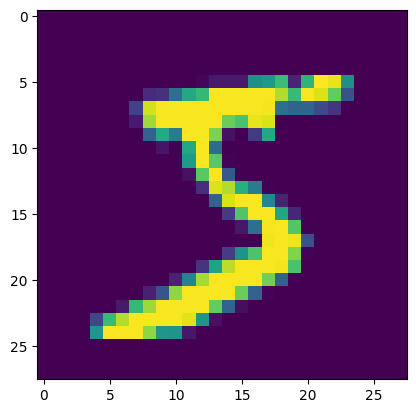

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

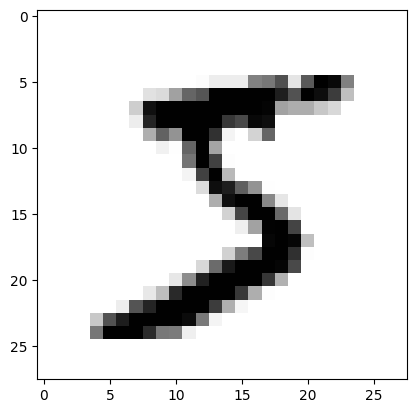

In [8]:
plt.imshow(x_train[0])
plt.show()
plt.imshow(x_train[0],cmap=plt.cm.binary)
print(x_train[0])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

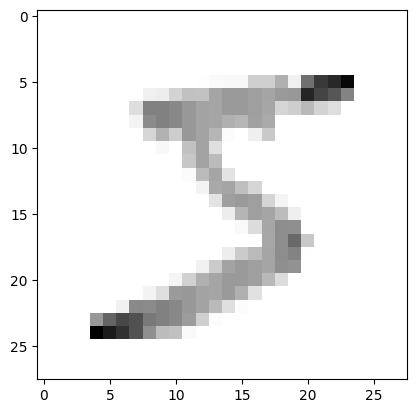

In [9]:
x_train = tf.keras.utils.normalize(x_train,axis=1)
x_test = tf.keras.utils.normalize(x_test,axis=1)
plt.imshow(x_train[0],cmap=plt.cm.binary)
print(x_train[0])

In [10]:
IMG_SIZE = 28
x_trainr = np.array(x_train).reshape(-1,IMG_SIZE,IMG_SIZE,1)
x_testr = np.array(x_test).reshape(-1,IMG_SIZE,IMG_SIZE,1)

In [12]:
model = Sequential()

# layer 1
model.add(Conv2D(64,(3,3),input_shape = x_trainr.shape[1:]))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

# layer 2
model.add(Conv2D(64,(3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

# layer 3
model.add(Conv2D(64,(3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

# fully connected layer 1
model.add(Flatten())
model.add(Dense(64))
model.add(Activation("relu"))

# fully connected layer 2
model.add(Dense(32))
model.add(Activation("relu"))

# fully connected layer 3
model.add(Dense(10))
model.add(Activation('softmax'))

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 64)        640       
                                                                 
 activation (Activation)     (None, 26, 26, 64)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        36928     
                                                                 
 activation_1 (Activation)   (None, 11, 11, 64)        0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                    

In [14]:
model.compile(loss = "sparse_categorical_crossentropy", optimizer="adam", metrics=['accuracy'])

In [15]:
model.fit(x_train,y_train,epochs=5,validation_split=0.3)

Epoch 1/5
1313/1313 [==============================] - 85s 63ms/step - loss: 0.3230 - accuracy: 0.8985 - val_loss: 0.1259 - val_accuracy: 0.9596
Epoch 2/5
1313/1313 [==============================] - 77s 59ms/step - loss: 0.1055 - accuracy: 0.9671 - val_loss: 0.0900 - val_accuracy: 0.9727
Epoch 3/5
1313/1313 [==============================] - 78s 59ms/step - loss: 0.0729 - accuracy: 0.9772 - val_loss: 0.0866 - val_accuracy: 0.9718
Epoch 4/5
1313/1313 [==============================] - 81s 62ms/step - loss: 0.0579 - accuracy: 0.9816 - val_loss: 0.0766 - val_accuracy: 0.9771
Epoch 5/5
1313/1313 [==============================] - 79s 60ms/step - loss: 0.0450 - accuracy: 0.9858 - val_loss: 0.0727 - val_accuracy: 0.9789


In [16]:
test_loss, test_acc = model.evaluate(x_testr,y_test)
print("test loss on 10000 test samples : ",test_loss)
print("validation Accuracy on 10000 test samples : ",test_acc)

313/313 [==============================] - 4s 14ms/step - loss: 0.0666 - accuracy: 0.9819
test loss on 10000 test samples :  0.06657316535711288
validation Accuracy on 10000 test samples :  0.9818999767303467


In [17]:
predictions = model.predict([x_testr])
print(predictions)

313/313 [==============================] - 4s 13ms/step
[[8.2665895e-07 2.0883598e-07 5.6543410e-08 ... 9.9991804e-01
  1.4509568e-07 4.4028311e-05]
 [3.5062025e-04 2.5447349e-05 9.9956363e-01 ... 3.6775198e-06
  3.3197226e-05 6.6143457e-07]
 [2.7365008e-06 9.9995583e-01 4.5988354e-06 ... 1.4028178e-05
  4.9355782e-07 2.6275029e-07]
 ...
 [1.3216480e-07 1.3338698e-07 8.2190960e-10 ... 3.3742332e-08
  1.5508091e-06 6.3093802e-07]
 [5.5296869e-07 1.4892250e-07 2.6402339e-11 ... 8.5503566e-12
  4.0436830e-06 3.7831586e-07]
 [3.4378949e-04 2.1467087e-05 4.5196543e-06 ... 1.8348267e-08
  9.4593030e-05 8.3731677e-05]]


In [18]:
print(np.argmax(predictions[99]))

9


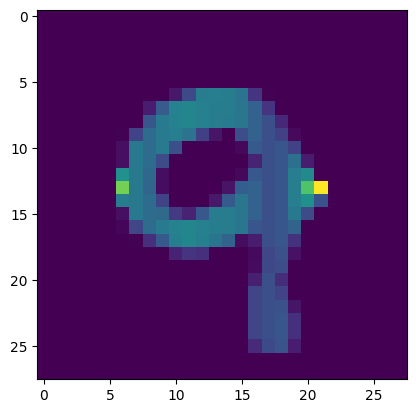

In [19]:
plt.imshow(x_test[99])

In [20]:
img = cv2.imread("/content/png-transparent-number-drawing-number-5-text-logo-numerical-digit.png")

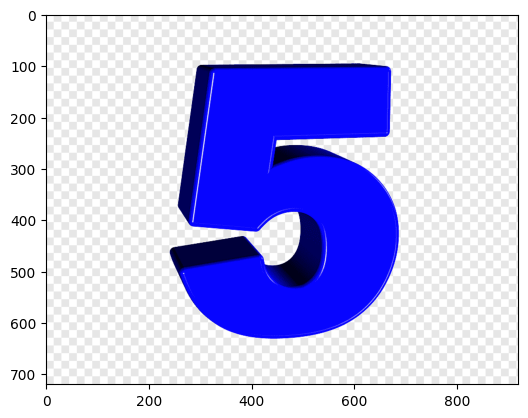

In [21]:
plt.imshow(img)

In [22]:
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

In [23]:
gray.shape

(720, 920)

In [24]:
resized = cv2.resize(gray,(28,28),interpolation = cv2.INTER_AREA)

In [25]:
newimg = tf.keras.utils.normalize(resized,axis=1)

In [26]:
newimg = np.array(newimg).reshape(-1,IMG_SIZE,IMG_SIZE,1)

In [27]:
newimg.shape

(1, 28, 28, 1)

In [28]:
print(np.argmax(model.predict(newimg)))

1/1 [==============================] - 0s 100ms/step
0
